<a href="https://colab.research.google.com/github/code-xD/QGT_Simulations/blob/main/QGT_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np

# Make data.
pi = np.pi
e = np.e
j = 1j


In [135]:
def func(X, Y, phi):
    R =   np.cos(X) * np.cos(Y) -  np.power(e, -1 * phi*j) * np.sin(X) * np.sin(Y) + np.power(e, -1 * phi*j) * np.cos(X) * np.sin(Y) + np.sin(X) * np.cos(Y)
    Z = np.square(np.real(R)) + np.square(np.imag(R)) - 1
    return Z
 

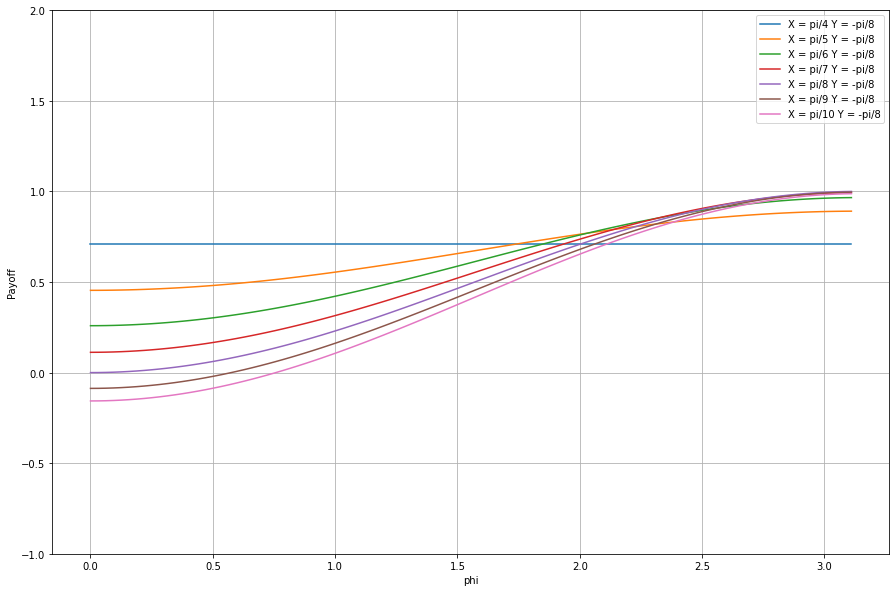

In [136]:
fig = plt.figure(figsize=[15,10])
ax = fig.gca()

# Make data.
phi = np.arange(0, pi, pi/100)
for i in range(4, 11):
    X = pi/i
    Y = -pi/8
    Z = func(X, Y, phi)
    plt.plot(phi, Z, label = f"X = pi/{i} Y = -pi/8") 

# naming the x axis 
plt.xlabel('phi') 
# naming the y axis 
plt.ylabel('Payoff')
plt.grid() 
# show a legend on the plot 
ax.set_ylim(-1, 2)
plt.legend() 
plt.show()

In [211]:
class QuantumGame:
    def __init__(self, N):
        self.channels = self.channelBasis(N)
        self.players = self.channelBasis(2)
        self.N = N
        self.psiI = np.kron(self.normalizedSum(self.players), self.normalizedSum(self.channels))
        self.movesB = np.asarray([])
        self.movesE = np.asarray([])
        self.psiF = self.psiI

    def unitary(self, lam, phi=0):
        U = np.matrix([[np.exp(j*phi) * np.cos(lam), -1 * np.sin(lam)], [ np.sin(lam), np.exp(-j*phi) * np.cos(lam)]])
        U = np.around(U, decimals=8)
        return U

    def channelBasis(self, dim):
        basis = []
        for i in range(0, dim):
            channel = np.zeros((dim,1))
            channel[i] = 1
            basis.append(channel)
        basis = np.asarray(basis, dtype='complex128')
        return basis

    def normalizedSum(self, channels):
        return 1/np.sqrt(np.size(channels, axis=1)) * np.sum(channels, axis = 1)

    def projector(self, qubit):
        return np.dot(qubit, np.transpose(qubit))

    def stratMatrix(self, moves, channels):
        strat = []
        for i in range(np.size(moves, axis=1)):
            strat.append(np.kron(moves[i], projector(channels[i])))
        return np.sum(strat,axis =0)

    def magQubit(self, p, c):
        return np.sign(np.around(np.dot(np.transpose(np.kron(self.players[p], self.channels[c])), self.psiF) - 1/(2*self.N), decimals=8)).real.item()

    def createRealMoves(self, angles):
        moves = []
        for angle in angles:
            moves.append(self.unitary(angle))
        moves = np.asarray(moves)
        return moves

    def calculateOutcome(self):
        UB = stratMatrix(self.movesB, self.channels)
        UE = stratMatrix(self.movesE, self.channels)
        print(np.dot(UB, UE))
        self.psiF = np.square(np.dot(np.dot(UB, UE), psiI))


In [212]:
Q1 = QuantumGame(2)
Q1.movesB = Q1.createRealMoves([pi/4, pi/4])
Q1.movesE = Q1.createRealMoves([-pi/4, -pi/4])
Q1.calculateOutcome()
Q1.magQubit(0,0)

[[ 9.99999997e-01+0.j  0.00000000e+00+0.j -1.18727821e-17+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  9.99999997e-01+0.j  0.00000000e+00+0.j
  -1.18727821e-17+0.j]
 [-1.18727821e-17+0.j  0.00000000e+00+0.j  9.99999997e-01+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.18727821e-17+0.j  0.00000000e+00+0.j
   9.99999997e-01+0.j]]


0.0

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator

fig = plt.figure(figsize=[20,20])
ax = fig.gca(projection='3d')

X = np.arange(0, pi/4, pi/100)
Y = np.arange(0, -pi/4, -pi/100)
X, Y = np.meshgrid(X, Y)
R = np.cos(X+Y) + np.sin(X+Y)
Z = np.sign(R*R-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# naming the x axis 
plt.xlabel(r'$\lambda_{B}$', fontsize = 18) 
# naming the y axis 
plt.ylabel(r'$\lambda_{E}$', fontsize = 18)
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(MultipleLocator(base=0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(MultipleLocator(base=0.1))
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()